In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import Image, display

In [2]:
# Read dataframe
df = pd.read_csv("amazon.csv",encoding='latin',thousands='.')
print("Total data in dataset:",len(df))
df.head()

Total data in dataset: 6454


,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


***

# Month-wise

In [3]:
# Months in Portuguese
# Couldn't sort it. Hence created the months in order naively.
months = [0 for i in range(12)]
months[0] = "Janeiro"
months[1] = "Fevereiro"
months[2] = 'Março'
months[3] = 'Abril'
months[4] = 'Maio'
months[5] = 'Junho'
months[6] = 'Julho'
months[7] = 'Agosto'
months[8] = 'Setembro'
months[9] = 'Outubro'
months[10] = 'Novembro'
months[11] = 'Dezembro'

In [4]:
# Number of forest fires per month
months_fire_count = {}
for i in months:
    months_fire_count[i] = df[df['month']==i]['number'].sum()
    print(i,":",df[df['month']==i]['number'].sum())

Janeiro : 52587
Fevereiro : 30952
Março : 35118
Abril : 28364
Maio : 46083
Junho : 111405
Julho : 217620
Agosto : 740841
Setembro : 1015925
Outubro : 629665
Novembro : 312326
Dezembro : 152596


Text(0, 0.5, 'Number of forest fires')

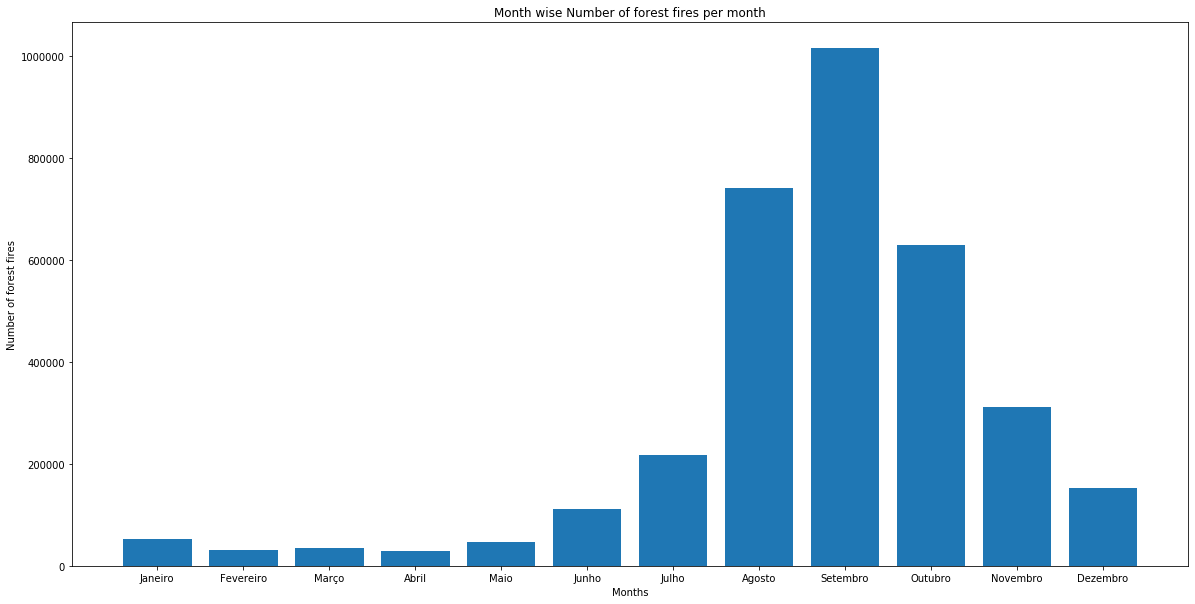

In [5]:
plt.figure(figsize=(20,10))
plt.title("Month wise Number of forest fires per month")
plt.bar(x = months_fire_count.keys(), height = months_fire_count.values())
plt.xlabel("Months")
plt.ylabel("Number of forest fires")

We can see months **September, August and October** having the highest number of fires. This seems to be a pattern where the period between July and December see the most fires. Probable reasons?

Temperature across these months?

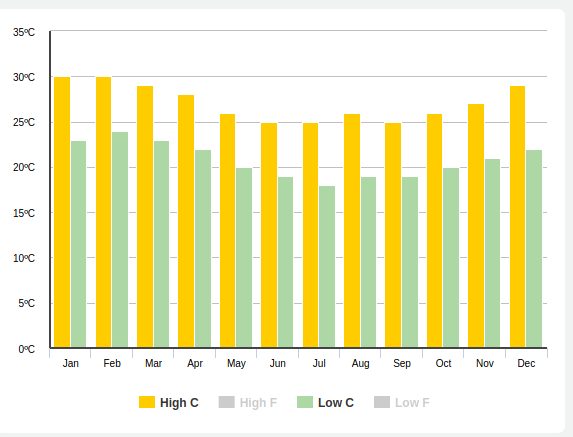

In [6]:
display(Image('external_sources/Average Temperatures across Months in Brazil.png', width = 800, unconfined=True))

This is counter intuitive from what we found in the previous plot. Our suspected reasoning was that because of heat, these specific months had a higher number of fires. But this plot shows that temperatures in August, September and October are **lower** than the rest, i.e. **it's actually colder during these months.**

The monthly data doesn't take into consideration the years. So we need to check if a single year had an irregularly high number of forest fires and as a result, has effected the total count.

In [7]:
# Count of years in the data
df['year'].value_counts().sort_index()

1998    324
1999    324
2000    324
2001    324
2002    324
2003    324
2004    324
2005    324
2006    324
2007    324
2008    324
2009    324
2010    324
2011    324
2012    324
2013    324
2014    324
2015    324
2016    324
2017    298
Name: year, dtype: int64

So we see, we have 19 years worth of data. Now lets see yearly distribution for the month-wise segregated data.

We will be considering the months August, September and October.

For month Abril


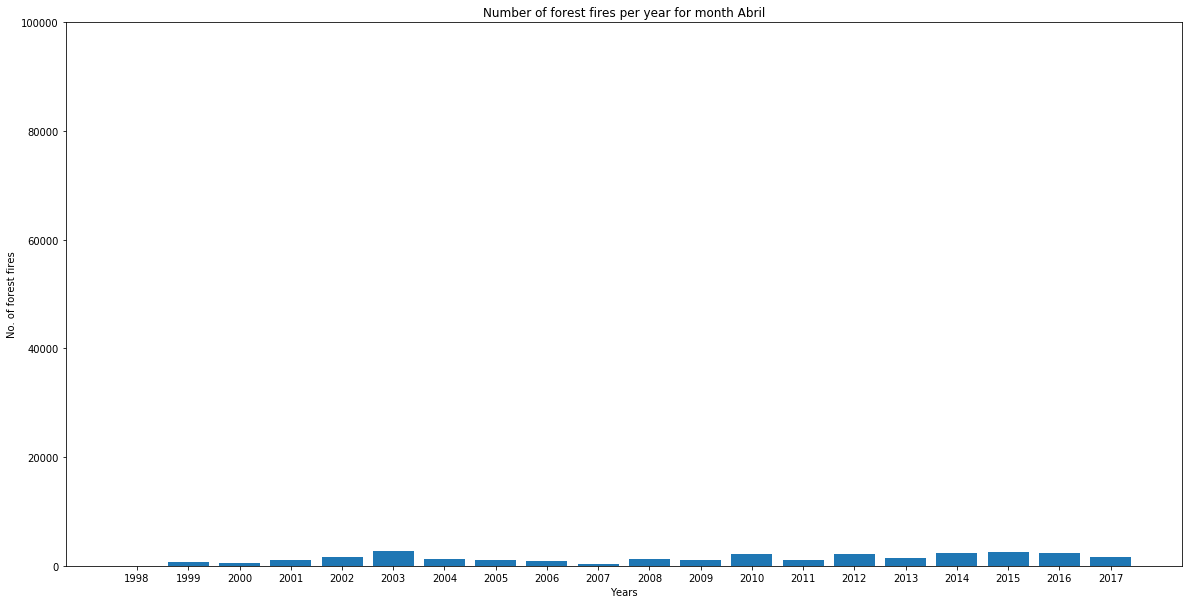

----------------------------------------
For month Agosto


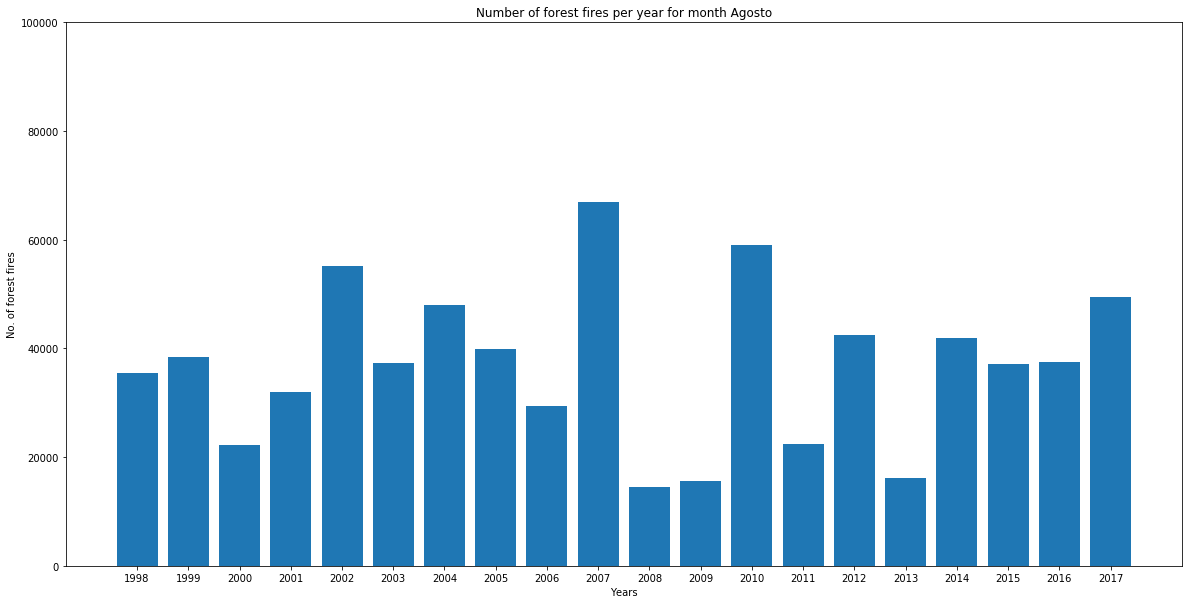

----------------------------------------
For month Dezembro


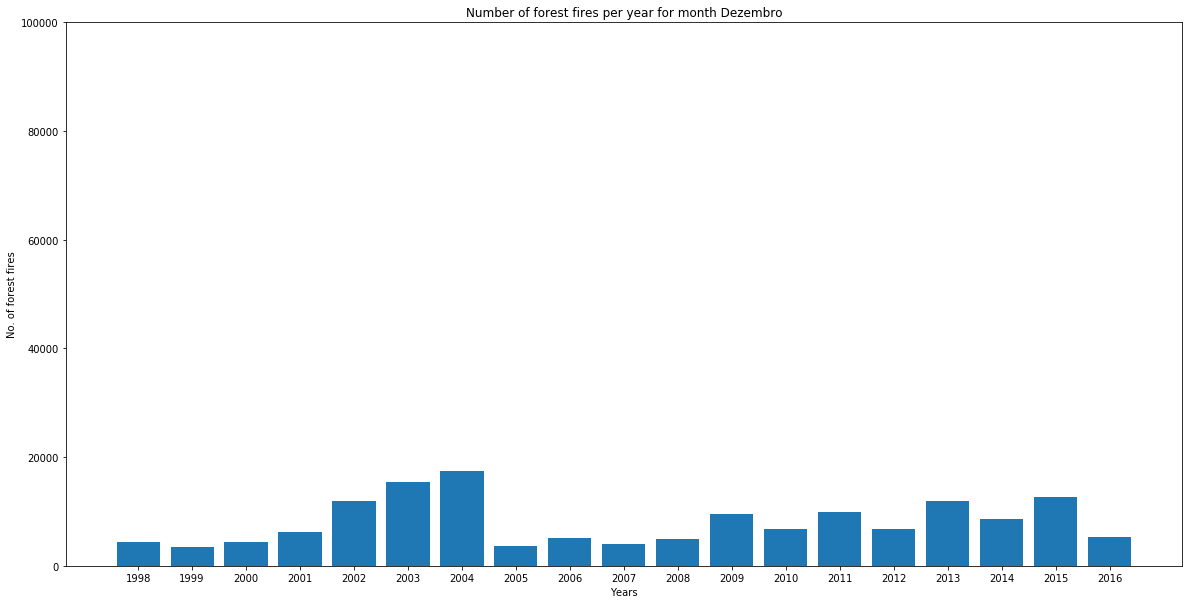

----------------------------------------
For month Fevereiro


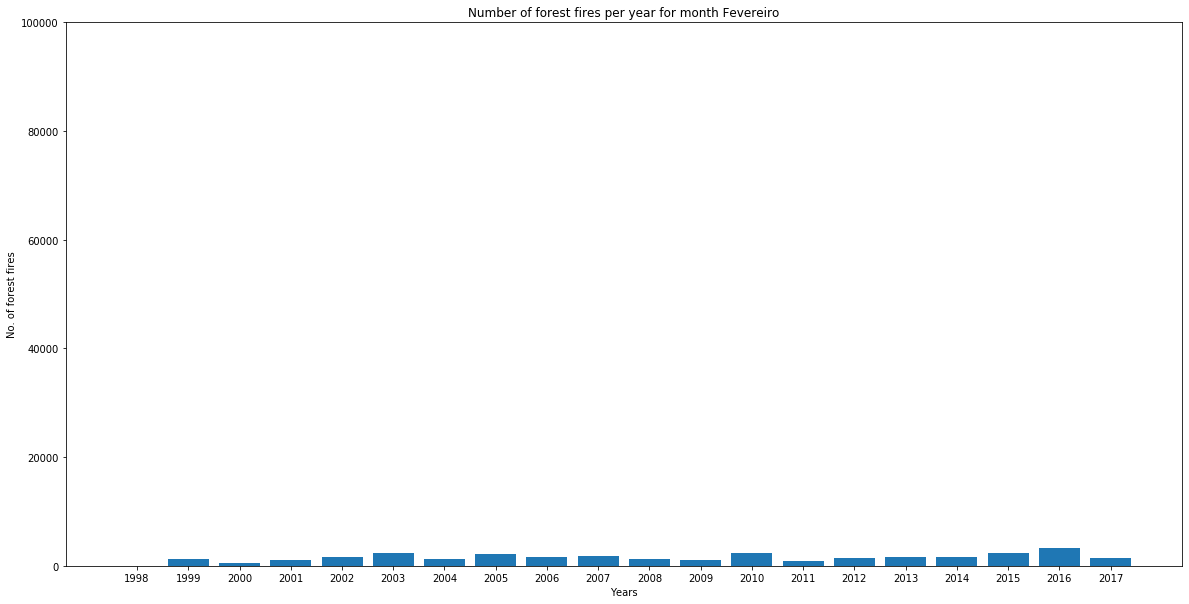

----------------------------------------
For month Janeiro


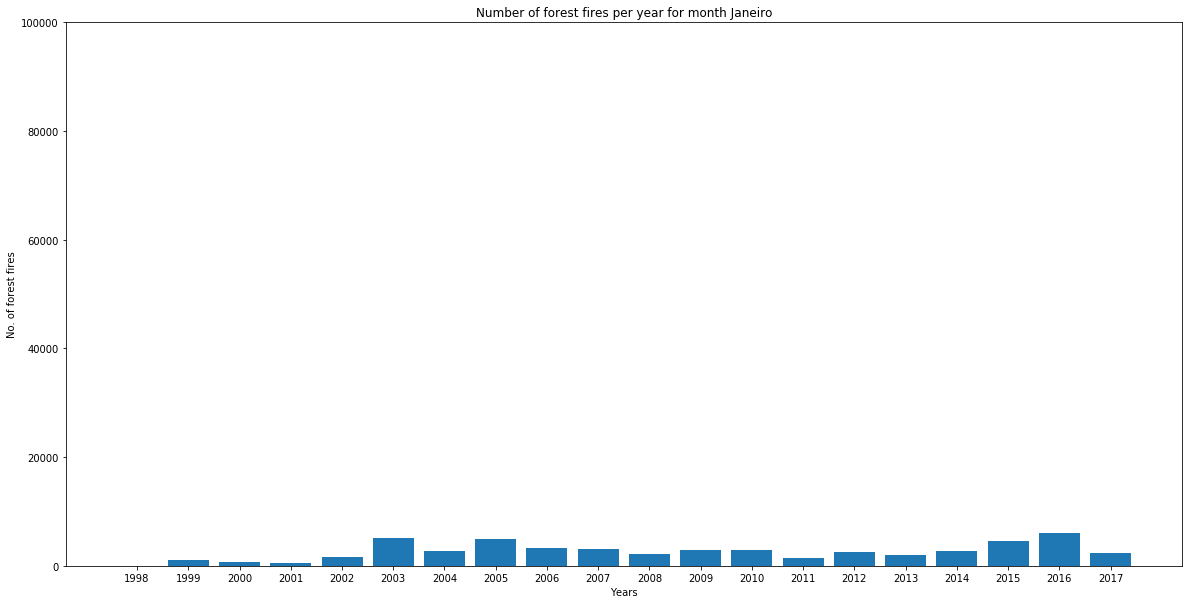

----------------------------------------
For month Julho


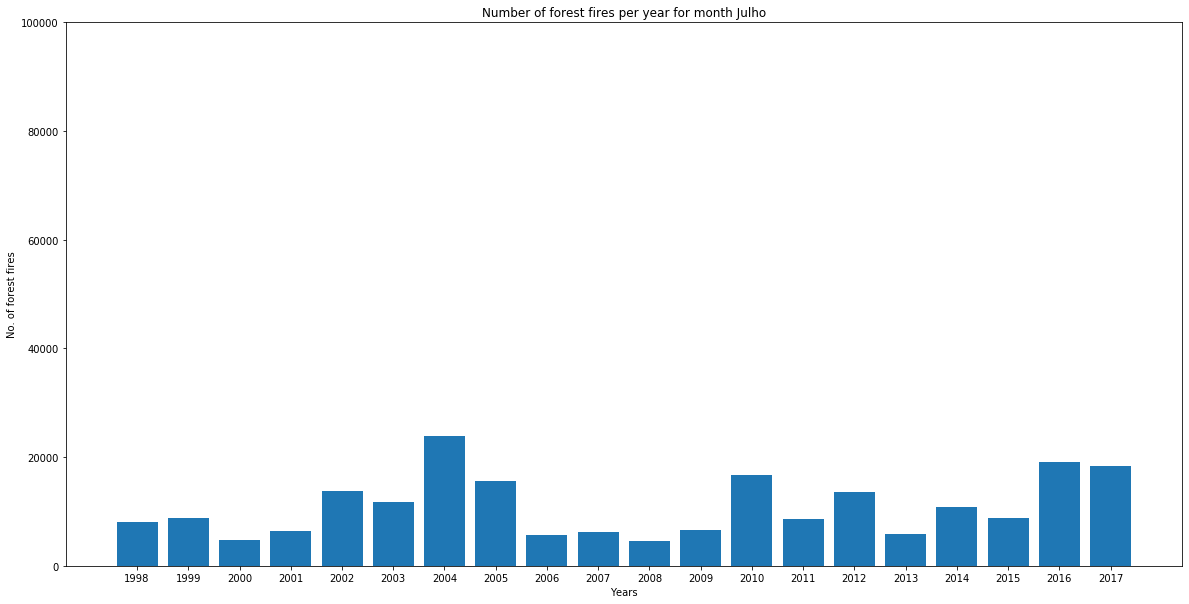

----------------------------------------
For month Junho


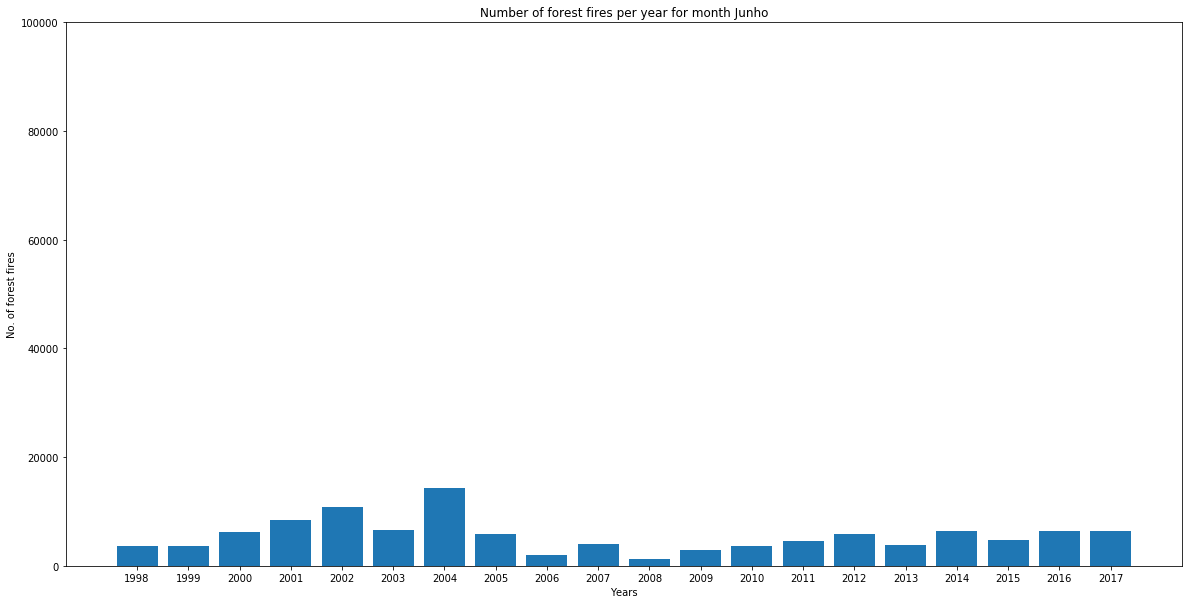

----------------------------------------
For month Maio


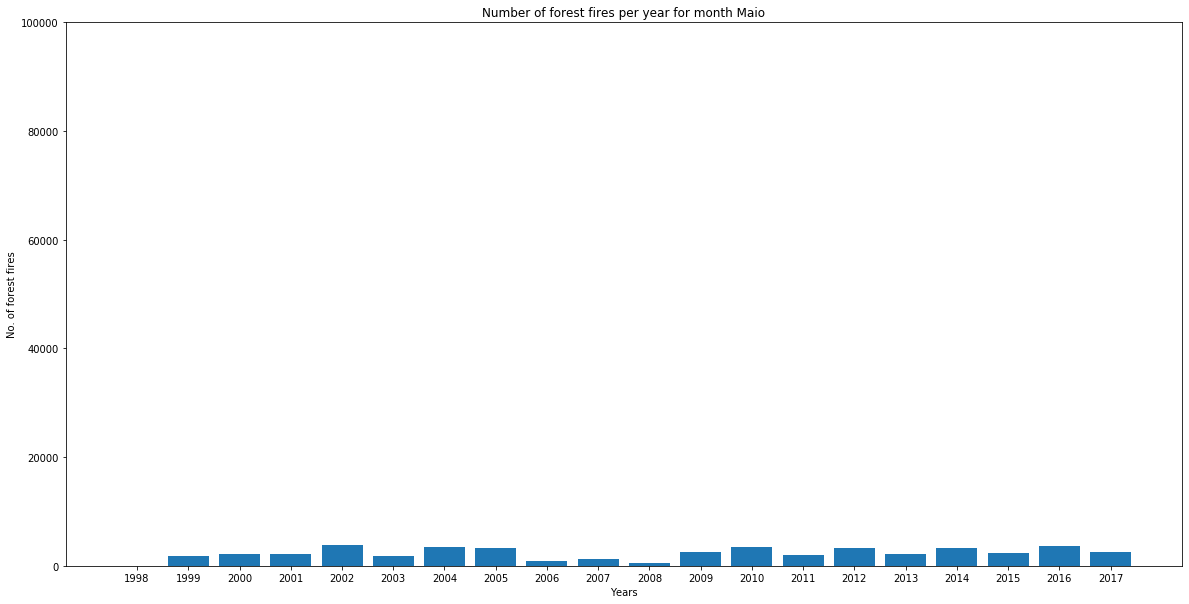

----------------------------------------
For month Março


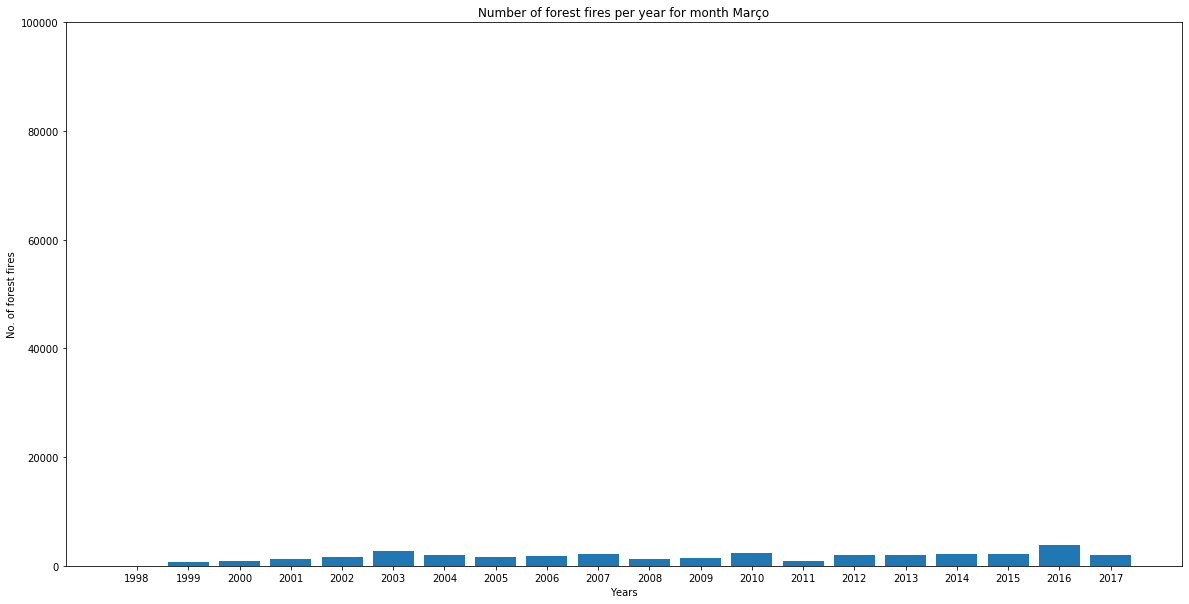

----------------------------------------
For month Novembro


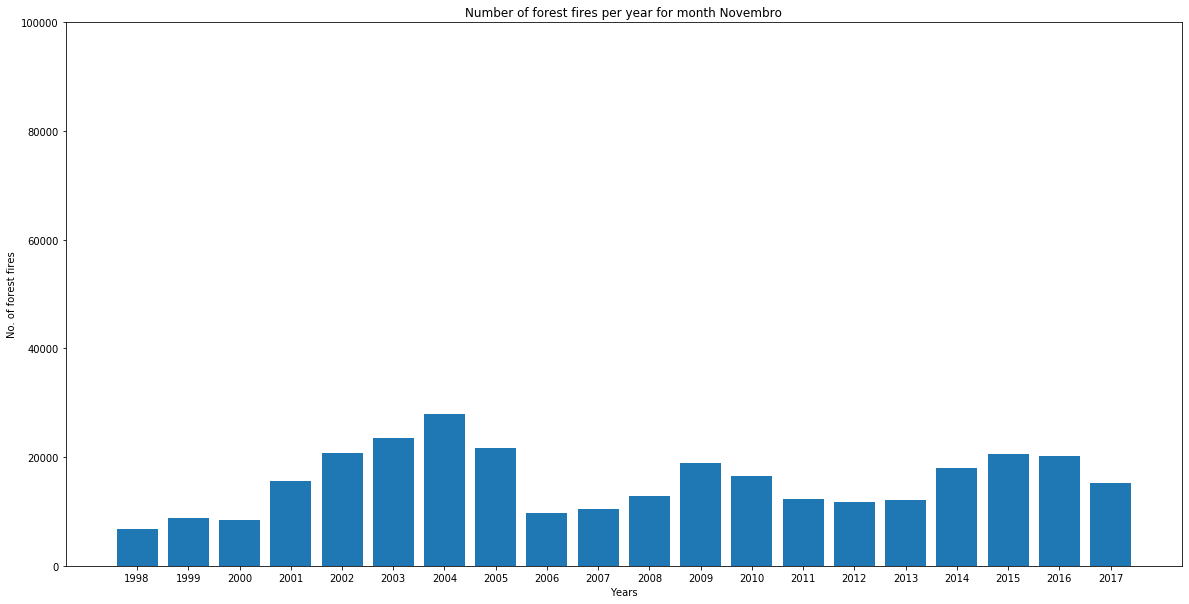

----------------------------------------
For month Outubro


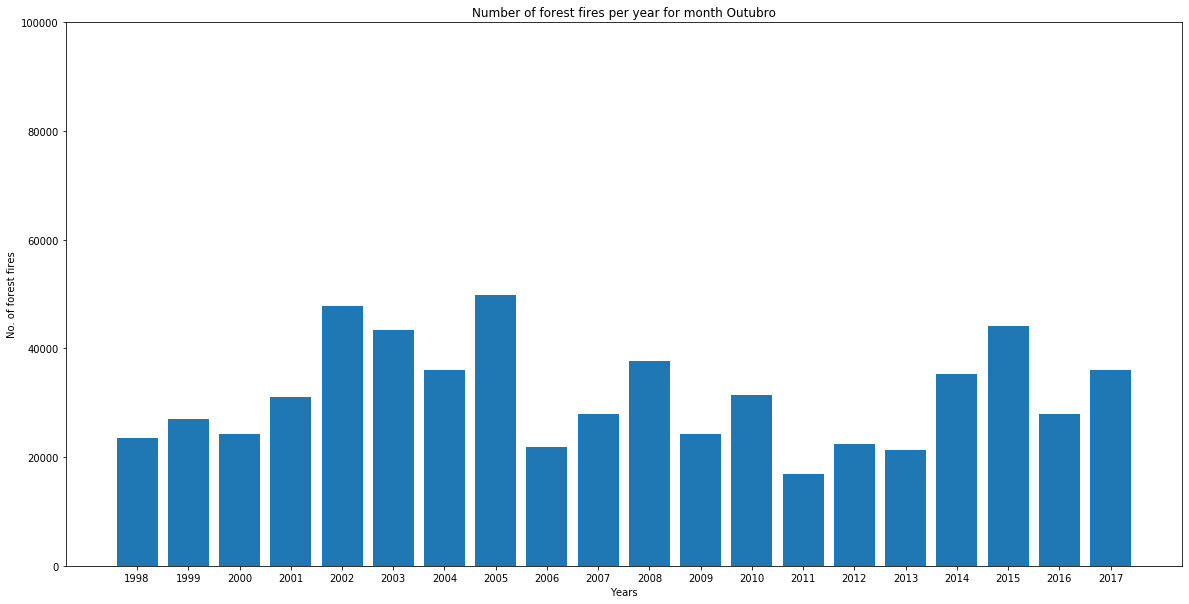

----------------------------------------
For month Setembro


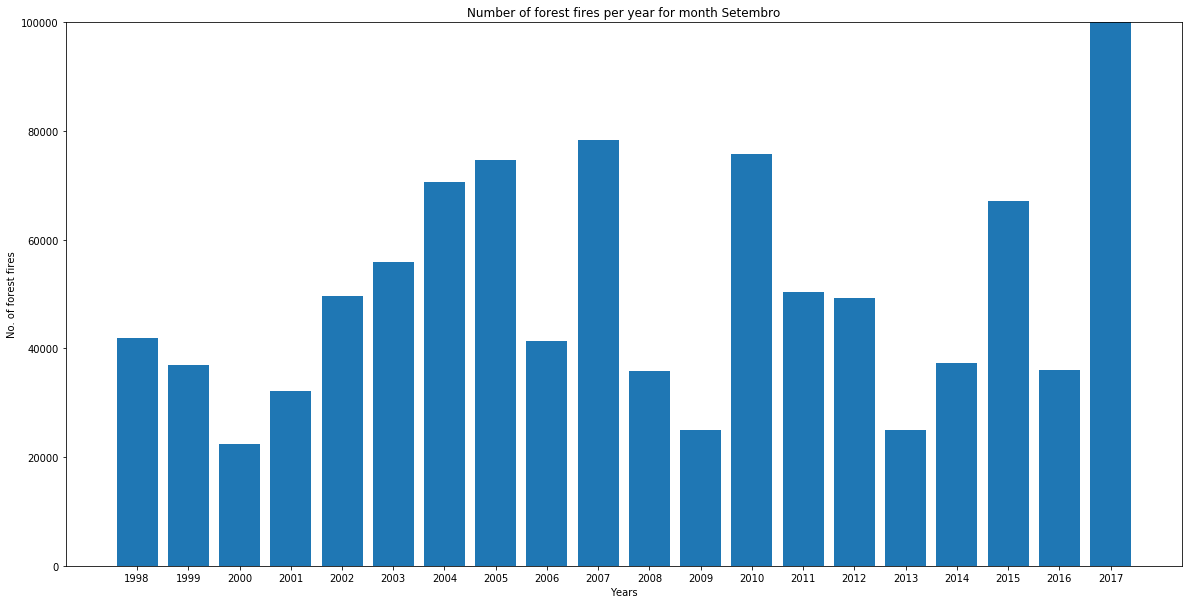

----------------------------------------


In [8]:
# For every month
for i in df['month'].value_counts().sort_index().index:
    print("For month",i)
    month = df.groupby(['month','year'])['number'].sum()[i]
    plt.figure(figsize=(20,10))
    plt.bar(x=month.index, height=month.values)
    plt.title("Number of forest fires per year for month "+str(i))
    plt.xticks(month.index)
    plt.xlabel("Years")
    plt.ylabel("No. of forest fires")
    plt.ylim([0,100000])
    #plt.savefig("./external_sources/each_month_per_year/"+i+".png")
    plt.show()
    print("-"*40)

In [9]:
for i in df['month'].value_counts().sort_index().index:
    print("For month",i)
    series = df.groupby(['month','year'])['number'].sum()[i].values
    perc = [0.05,0.85]
    print(pd.Series(series).describe(percentiles=perc))

For month Abril
count      20.000000
mean     1418.200000
std       767.975027
min         0.000000
5%        394.250000
50%      1294.000000
85%      2361.150000
max      2677.000000
dtype: float64
For month Agosto
count       20.000000
mean     37042.050000
std      14435.687785
min      14528.000000
5%       15483.700000
50%      37395.000000
85%      50327.100000
max      66837.000000
dtype: float64
For month Dezembro
count       19.000000
mean      8031.368421
std       4186.341577
min       3377.000000
5%        3610.100000
50%       6823.000000
85%      12198.300000
max      17524.000000
dtype: float64
For month Fevereiro
count      20.000000
mean     1547.600000
std       708.369024
min         0.000000
5%        532.950000
50%      1491.500000
85%      2320.550000
max      3202.000000
dtype: float64
For month Janeiro
count      20.000000
mean     2629.350000
std      1584.671783
min         0.000000
5%        519.650000
50%      2562.000000
85%      4688.250000
max      5979.0

We can see that **September has an unusually high number of forest fires in 2017**. Almost twice the mean number of forest fires in September. That would suggest the unusually high total count of forest fires in September.

We have checked the temparature for different months. Now, we need to corelate it with precipitation.

***

# Year-wise

In [10]:
# years
years = df['year'].values

In [11]:
yearly_fire_count = {}
for i in years:
    yearly_fire_count[i] = df[df['year']==i]['number'].sum()
    print("Year",i,":",yearly_fire_count[i])

Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223

Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117

Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223

Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 10

Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 20

Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220

Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111

Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223

Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206

Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123

Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 24

Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220

Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206412
Year 2008 : 117993
Year 2009 : 111763
Year 2010 : 223228
Year 2011 : 131271
Year 2012 : 163353
Year 2013 : 105572
Year 2014 : 170259
Year 2015 : 209296
Year 2016 : 171132
Year 2017 : 246289
Year 1998 : 123881
Year 1999 : 132526
Year 2000 : 97541
Year 2001 : 137926
Year 2002 : 220015
Year 2003 : 208476
Year 2004 : 248928
Year 2005 : 224294
Year 2006 : 123327
Year 2007 : 206

Text(0, 0.5, 'Number of forest fires')

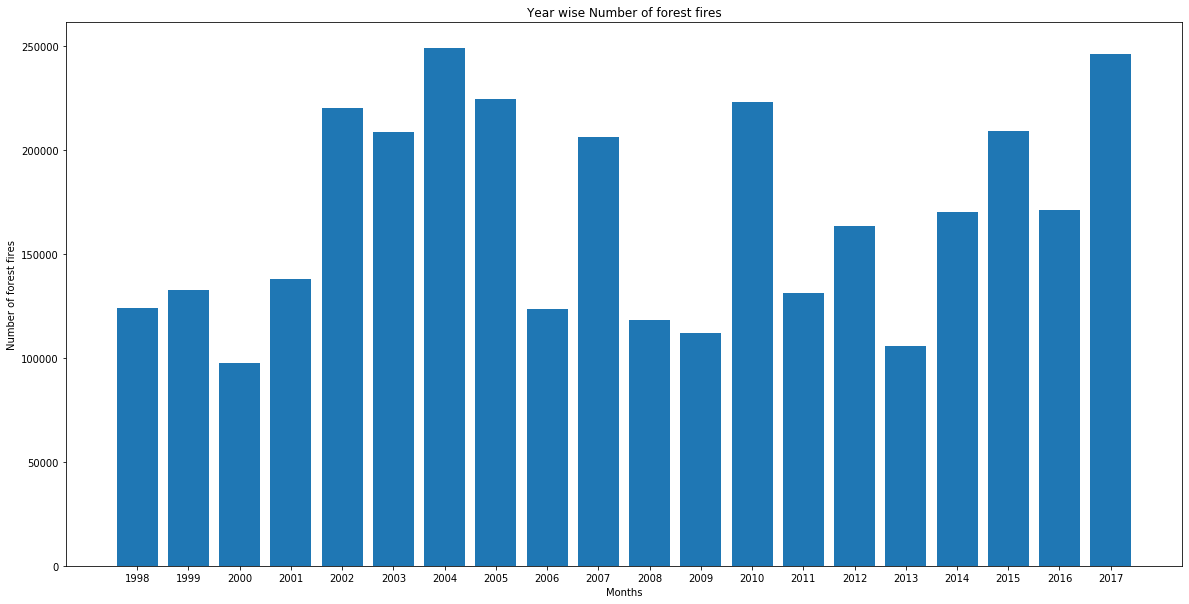

In [12]:
plt.figure(figsize=(20,10))
plt.title("Year wise Number of forest fires")
plt.bar(x = yearly_fire_count.keys(), height = yearly_fire_count.values(), tick_label = list(yearly_fire_count.keys()))
plt.xlabel("Months")
plt.ylabel("Number of forest fires")

--------------------------------------------------------------------------------------------------------------

# State-wise 

In [13]:
states = df['state'].value_counts().index.tolist()

In [14]:
state_fire_count = {}
for i in states:
    print(i,":",df[df['state']==i]['number'].sum())

Rio : 50021
Mato Grosso : 767890
Paraiba : 65206
Alagoas : 4644
Ceara : 80162
Maranhao : 375279
Acre : 68345
Piau : 178707
Roraima : 29454
Minas Gerais : 169223
Bahia : 226979
Distrito Federal : 3561
Sergipe : 3237
Goias : 111970
Pernambuco : 24498
Amapa : 25116
Santa Catarina : 27209
Tocantins : 212432
Amazonas : 117467
Espirito Santo : 6546
Sao Paulo : 62308
Rondonia : 185387
Pará : 577841


Text(0, 0.5, 'Number of forest fires')

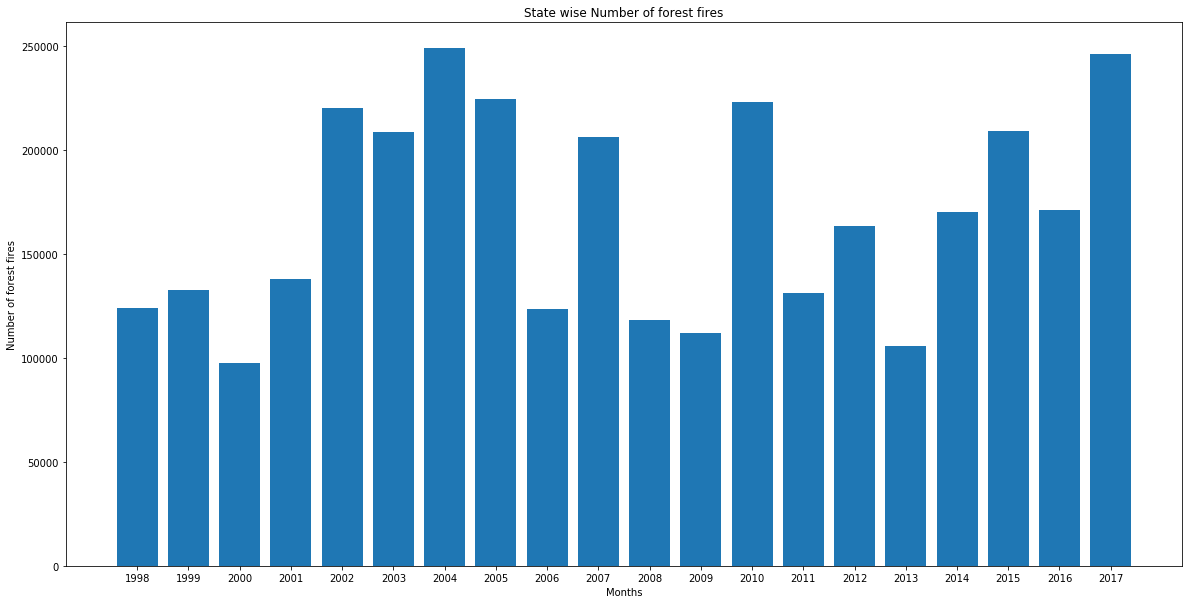

In [15]:
plt.figure(figsize=(20,10))
plt.title("State wise Number of forest fires")
plt.bar(x = yearly_fire_count.keys(), height = yearly_fire_count.values(), tick_label = list(yearly_fire_count.keys()))
plt.xlabel("Months")
plt.ylabel("Number of forest fires")